In [2]:
#loading packages
%matplotlib inline
import pandas as pd
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from sklearn.neighbors import KNeighborsClassifier
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.decomposition import PCA

print('Done!')


Done!


In [3]:
## Getting MNIST data 


##Defining Input and target and normalizing the input



from tensorflow.keras.datasets import mnist

(inp_tr, tar_tr), (inp_va, tar_va) = mnist.load_data()
inp_tr= inp_tr/255.
inp_va= inp_va/255.
inp_tr = np.reshape(inp_tr,(-1,784))
inp_va = np.reshape(inp_va,(-1,784))



print (np.shape(inp_tr),np.shape(inp_va))


(60000, 784) (10000, 784)


In [4]:
print (tar_tr[0:100]) ## Shuffled?  Yes!
print ('--------------------------------')
print (tar_va[0:100]) ## Shuffled?  Yes!

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
--------------------------------
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


<Figure size 432x288 with 0 Axes>

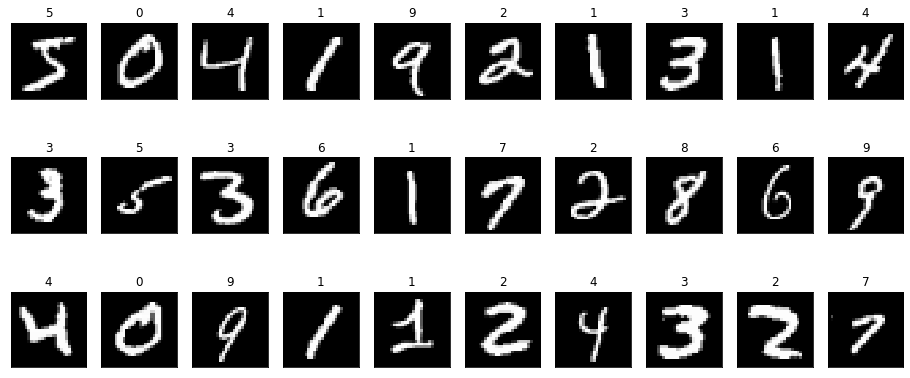

In [4]:
# presenting some digits

n1=0
n2=30
plt.gray()
fig = plt.figure( figsize=(16,7) )
for k1 in range(n1,n2):
    ax = fig.add_subplot(3,10,k1+1, title=str(int(tar_tr[k1])))
    ax.matshow(inp_tr[k1].reshape((28,28)).astype(float))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [5]:
positive = 5
negative = 1

idx_tr_p= np.where(tar_tr==positive)[0]  # find index rows that are positive  (training set)
idx_tr_n= np.where(tar_tr==negative)[0]  # find index rows that are negative (training set)

tar_tr_p= np.zeros(len(idx_tr_p))  # five is the positive  (1) in our binary classification
tar_tr_n= np.ones(len(idx_tr_n))   # five is the negative (0) in our binary classification

inp_tr_p=inp_tr[idx_tr_p,:]   # separate input related to 5
inp_tr_n=inp_tr[idx_tr_n,:]   # separate input related to 5



print (np.shape(inp_tr_p),np.shape(tar_tr_p))  # size input 5 and target 5
print (np.shape(inp_tr_n),np.shape(tar_tr_n))  # size input 5 and target 5

print('------------------------------------------')

X_tr_Norm= np.concatenate((inp_tr_n,inp_tr_p))
Y_tr= np.concatenate((tar_tr_n,tar_tr_p))

print (np.shape(X_tr_Norm))  # size input 5&4 
print (np.shape(Y_tr))  # size input 5&4 


(5421, 784) (5421,)
(6742, 784) (6742,)
------------------------------------------
(12163, 784)
(12163,)


In [6]:
idx_va_p= np.where(tar_va==positive)[0]  # find index rows that are positive  (training set)
idx_va_n= np.where(tar_va==negative)[0]  # find index rows that are negative (training set)

tar_va_p= np.zeros(len(idx_va_p))  # five is the positive  (1) in our binary classification
tar_va_n= np.ones(len(idx_va_n))   # five is the negative (0) in our binary classification

inp_va_p=inp_va[idx_va_p,:]   # separate input related to 5
inp_va_n=inp_va[idx_va_n,:]   # separate input related to 5



print (np.shape(inp_va_p),np.shape(tar_va_p))  # size input 5 and target 5
print (np.shape(inp_va_n),np.shape(tar_va_n))  # size input 5 and target 5

print('------------------------------------------')

X_va_Norm= np.concatenate((inp_va_n,inp_va_p))
Y_va= np.concatenate((tar_va_n,tar_va_p))

print (np.shape(X_va_Norm))  # size input 5&4 
print (np.shape(Y_va))  # size input 5&4 


(892, 784) (892,)
(1135, 784) (1135,)
------------------------------------------
(2027, 784)
(2027,)


In [7]:

# time_start = time.time()
# knn = KNeighborsClassifier(n_neighbors=30)


# knn.fit (X_tr_Norm,Y_tr)  # fit the model with training set



# ## predict the response for tr and va sets. We can have two outputs: probability (e.g.,Y_tr_prob ) and  the winner class (e.g.,Y_tr):
# Y_tr_prob = knn.predict_proba(X_tr_Norm)[:,1]
# Y_tr_pred = knn.predict(X_tr_Norm)

# Y_va_prob = knn.predict_proba(X_va_Norm)[:,1]
# Y_va_pred = knn.predict(X_va_Norm)


# idx_tr_1 = (Y_tr==1)
# idx_tr_0 = (Y_tr==0)


# idx_va_1 = (Y_va==1)
# idx_va_0 = (Y_va==0)


# print ('Training done! Time elapsed: {} seconds'.format(time.time()-time_start))

# print ('Done')

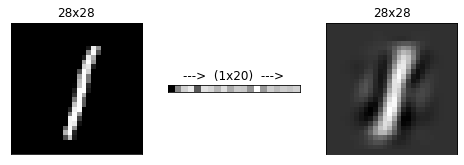

In [8]:
# use the first n principle componets to reconstract an image  


n_pic = np.random.choice(np.arange(len(X_va_Norm)))  # pick up an image from the validation set to see the original and reconstructed images
for kc in [20]:  # choose a number in the bracket as n principle componets
    n_components=kc
    pca=PCA(n_components=n_components)


    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(X_tr_Norm)
    inp_va_pca = pca.transform(X_va_Norm)

    sx= int(np.sqrt(n_components))
    sy= int(np.sqrt(n_components))
    plt.figure(n_pic, figsize=(8,8))
    approximation = pca.inverse_transform(inp_va_pca[n_pic]) # re-constract the image
    fig = plt.figure(n_pic)
    plt.subplot(1, 3, 1)
    plt.imshow(X_va_Norm[n_pic].reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 2)
    plt.imshow(inp_va_pca[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.title('--->  (1x'+str(n_components)+')  --->')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 3)
    plt.imshow(approximation.reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])




    plt.show()

In [9]:

time_start = time.time()
#logistic= linear_model.LogisticRegression(penalty='l2',  tol=0.0001, C=1, fit_intercept=True,
                                                 # intercept_scaling=1, solver='lbfgs', max_iter=10000) 
cls= linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.0000001, 
                                   l1_ratio=0.15, fit_intercept=True, max_iter=1000,
                                   tol=0.001, shuffle=True, verbose=0, epsilon=0.1,
                                   n_jobs=None, random_state=None, learning_rate='optimal',
                                   eta0=0.0, power_t=0.5, early_stopping=False,
                                   validation_fraction=0.1, n_iter_no_change=5,
                                   class_weight=None, warm_start=False, average=False)

cls.fit (inp_tr_pca,Y_tr)  # fit the model with training set



## predict the response for tr and va sets. We can have two outputs: probability (e.g.,Y_tr_prob ) and  the winner class (e.g.,Y_tr):
Y_tr_prob = cls.predict_proba(inp_tr_pca)[:,1]
Y_tr_pred = cls.predict(inp_tr_pca)

Y_va_prob = cls.predict_proba(inp_va_pca)[:,1]
Y_va_pred = cls.predict(inp_va_pca)


idx_tr_1 = (Y_tr==1)
idx_tr_0 = (Y_tr==0)


idx_va_1 = (Y_va==1)
idx_va_0 = (Y_va==0)


print ('Training done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Done')


Training done! Time elapsed: 0.06482791900634766 seconds
Done


## Checking different metrics (for training and validation sets)

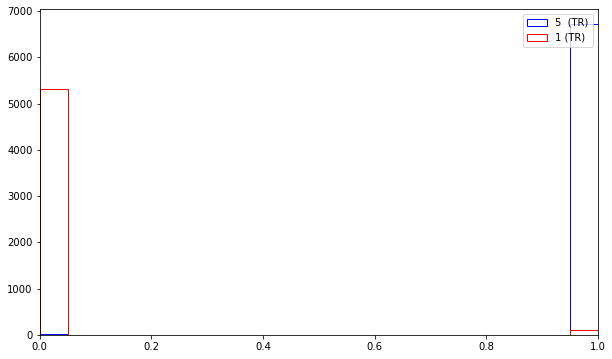

In [10]:
plt.figure(figsize=(10, 6))

plt.figure(1)
plt.hist(Y_tr_prob[idx_tr_1],20,histtype='step',color = "blue", label= str (positive)+'  (TR)')

plt.xlim([0,1])
plt.legend()


plt.figure(1)
plt.hist(Y_tr_prob[idx_tr_0],20,histtype='step',color = "red",label=str(negative)+' (TR)')

plt.xlim([0,1])

plt.legend()

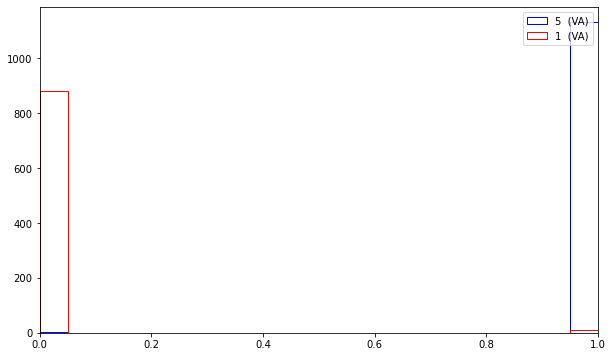

In [11]:
plt.figure(figsize=(10, 6))

plt.figure(1)
plt.hist(Y_va_prob[idx_va_1],20,histtype='step',color = "blue", label= str (positive)+'  (VA)')

plt.xlim([0,1])
plt.legend()


plt.figure(1)
plt.hist(Y_va_prob[idx_va_0],20,histtype='step',color = "red",label= str (negative)+'  (VA)')

plt.xlim([0,1])

plt.legend()

Text(0.5, 1.0, 'TR')

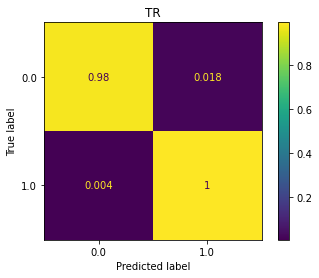

In [12]:
plot_confusion_matrix(cls, inp_tr_pca, Y_tr, normalize='true') 
plt.title('TR')

Text(0.5, 1.0, 'VA')

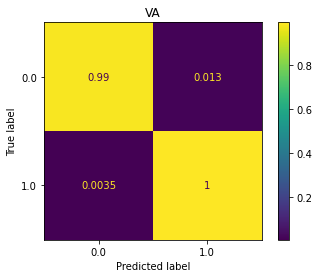

In [13]:
plot_confusion_matrix(cls, inp_va_pca, Y_va, normalize='true') 
plt.title('VA')

Text(0.5, 1.0, 'AUC Training')

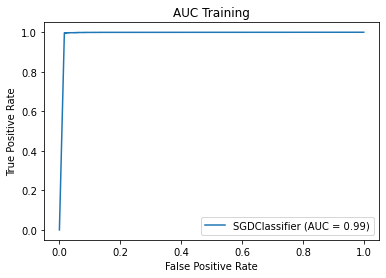

In [14]:
metrics.plot_roc_curve(cls, inp_tr_pca, Y_tr)
plt.title('AUC Training')

Text(0.5, 1.0, 'AUC Validation')

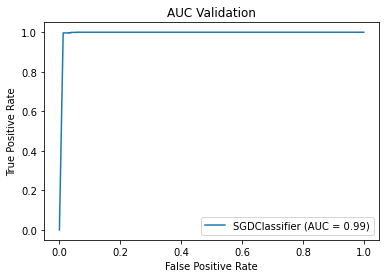

In [15]:
metrics.plot_roc_curve(cls, inp_va_pca, Y_va)
plt.title('AUC Validation')

In [16]:
print ("Accuracy (TR) = ", metrics.accuracy_score(Y_tr, Y_tr_pred))
print ("Accuracy (VA) = ", metrics.accuracy_score(Y_va, Y_va_pred))

Accuracy (TR) =  0.9898873633149716
Accuracy (VA) =  0.992106561420819


In [17]:
print ("Recall (TR) = ", metrics.recall_score(Y_tr, Y_tr_pred))
print ("Recall (VA) = ", metrics.recall_score(Y_va, Y_va_pred))

Recall (TR) =  0.9959952536339365
Recall (VA) =  0.9964757709251101


In [18]:
print ("Precision (TR) = ", metrics.precision_score(Y_tr, Y_tr_pred))
print ("Precision (VA) = ", metrics.precision_score(Y_va, Y_va_pred))


Precision (TR) =  0.9859051534282778
Precision (VA) =  0.989501312335958


In [19]:
np.shape(inp_tr_pca)

(12163, 20)